### Amazon Fine-Food Reviews Dataset

## Summary of the dataset:

* The data consist of 568454 rows and 10 columns.

* The data consist of following information.
    * The unique id of each product(ProductId)
    * Unique Id of each user(UserId)
    * a rating from 1 to 5(Score)
    * time at which review was posted(Time)
    * summary of the review given(Summary)
    * review given by the customer(Text)
* Columns that were removed.
    * profile name - (the nick name of the user)
    * Helpfulness numerator - (was the review helpful to others)
    * Helpfulness denominator - (helpfull+ not helpful)
    
* Column Data-types:
    * ProductId - object type
    * UserId - object type
    * Score - int(1-5)
    * Time - time stamp
    * summary - text data
    * text - text data
* There are 27 null values in summary column and else everything is non-null.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#importing dataset
import pandas as pd
df=pd.read_csv(r"D:\study material\ML\Datasets\amazon-fine-food-reviews\Reviews.csv",nrows=50000)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
Id                        50000 non-null int64
ProductId                 50000 non-null object
UserId                    50000 non-null object
ProfileName               49997 non-null object
HelpfulnessNumerator      50000 non-null int64
HelpfulnessDenominator    50000 non-null int64
Score                     50000 non-null int64
Time                      50000 non-null int64
Summary                   49998 non-null object
Text                      50000 non-null object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [5]:
import numpy as np
np.sum(df.isna())

Id                        0
ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [6]:
df=df.drop('Id',axis=1)

In [7]:
df.shape

(50000, 9)

##  Now performing basic Exploratory data analyis on the datasets

## 1. Distribution of Ratings.

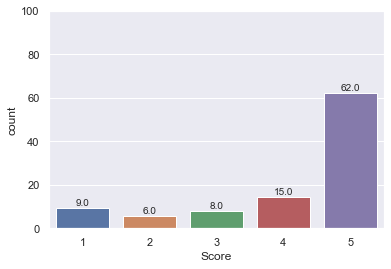

In [8]:
ax=sns.countplot(data=df,x='Score',ax=plt.axes(ylim=(0,100)))
for i in ax.patches:
    i.set_height((i.get_height()/len(df))*100)
    ax.text(i.get_x()+i.get_width()/2,
            i.get_height()+1,
            '{}'.format(round(i.get_height())),
            ha='center')

## Observation:
1. 60% (approx.) of the reviews have rating 5.
2. 15% (approx.) of the reviews have rating 4.
3. <25% of the reviews have rating 3 or less.

## 2. HelpfullNess

* A review that is more helpful appears on top so I need to check helpfullness also.

In [9]:
# removing non-ueful column 
df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']]
try:
    df=df.drop([44736,64421],axis=0)
except:
    pass

In [10]:
#not useful data
m=df[(df['HelpfulnessNumerator']==0)&(df['HelpfulnessDenominator']==0)]
print('About {:.2f} % data is not at all useful beacuse it is neither helpful nor not helpful'.format((len(m)/len(df)*100)))

About 48.46 % data is not at all useful beacuse it is neither helpful nor not helpful


In [11]:
#useful data
o=df[((df['HelpfulnessNumerator']<=df['HelpfulnessDenominator'])&
     ((df['HelpfulnessNumerator']!=0)&(df['HelpfulnessDenominator']!=0)))|
     ((df['HelpfulnessNumerator']==0) &(df['HelpfulnessDenominator']!=0))]
print('About {:.2f} % data is useful beacuse it is either helpful or not helpful'.format(len(o)/len(df)*100))

About 51.54 % data is useful beacuse it is either helpful or not helpful


In [12]:
# adding a new column that is percentage of helpfulness
df['Perc_help']=o['HelpfulnessNumerator']/o['HelpfulnessDenominator']*100

In [13]:
df.fillna(-1,inplace=True)

In [14]:
import math
df['Perc_help']=df['Perc_help'].apply(int)

In [15]:
#diving the data into four parts
arr=[]
for i in df.Perc_help:
    if i>75:
        arr.append('>75%')
    elif i<=75 and i>=25:
        arr.append('25-75%')
    elif i>=0 and i<25:
        arr.append('<25%')
    else:
        arr.append('Not mentioned')
df['Perc_help']=arr
        

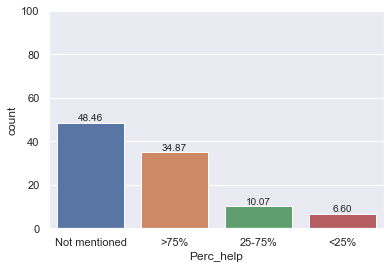

In [16]:
ax=sns.countplot(x='Perc_help',data=df,order=['<25%','25-75%','>75%','Not mentioned'][::-1],ax=plt.axes(ylim=(0,100)))
import math
for i in ax.patches:
    i.set_height((i.get_height()/len(df)*100))
    ax.text(i.get_x()+i.get_width()/2,i.get_height()+1,'{:.2f}'.format(i.get_height()),ha='center')

In [17]:
#categorizing the data into helpful, not helpful and cannot say
arr=[]
for i in df['Perc_help']:
    if i=='<25%':
        arr.append('Not Helpful')
    elif i=='>75%':
        arr.append('Helpful')
    elif i=='25-75%':
        arr.append('cannot say')
    else:
        arr.append(0)
df['Help']=arr

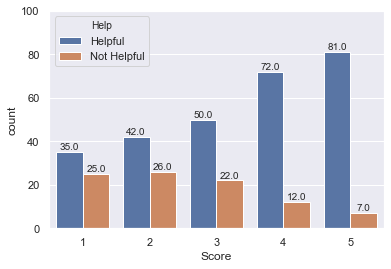

In [18]:
# creating the plot and adding labels to the plot rectangle 
ax=sns.countplot('Score',hue='Help',data=df[(df['Help']!=0)&(df['Help']!='cannot say')],ax=plt.axes(ylim=(0,100)))
for i in range(10):
    if i==0 or i==5:
        l=len(df[(df['Score']==1) & (df['Help']!=0)])
    elif i==1 or i==6:
        l=len(df[(df['Score']==2) & (df['Help']!=0)])
    elif i==2 or i==7:
        l=len(df[(df['Score']==3) & (df['Help']!=0)])
    elif i==3 or i==8:
        l=len(df[(df['Score']==4) & (df['Help']!=0)])
    elif i==4 or i==9:
        l=len(df[(df['Score']==5) & (df['Help']!=0)])
        
    k=ax.patches[i]
    k.set_height(round(k.get_height()/l*100))
    ax.text(k.get_x()+k.get_width()/2,k.get_height()+1,'{}'.format(k.get_height()),ha='center')


## Observation: 
* Out of all the reviews 48% reviews are neither Helpful nor not Helpful, only 52% are either helpful or not Helpful.
* Now the 52 % could be further classified into three categories >75 % , 25-75%, and <25% people find it helpful.
* Now we call >75% reviews as helpful, and <25% not helpful and cannot say anything about 25-75 %.
* Most of the reviews lie in the category >75%.
* **Now we see that the reviews that are more positive are more helpful reviews.**
* 81% people find review with rating 5 helpful and 7% found it not-helpful.
* 34% people find review with rating 5 helpful and 27% fould it not-helpful

# 3. Word Count 
* Now I want to see how the words count changes with review

### How does word count changes with rating?

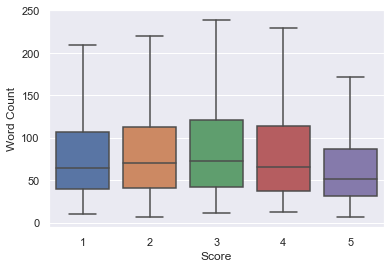

In [19]:
#Data is not cleaned yet bare with it 
temp=[]
for i in df['Text']:
    try:
        temp.append(len(i.split()))
    except:
        temp.append(0)

df['Word Count']=temp
ax=sns.boxplot(y='Word Count',x='Score',data=df,showfliers=False)


### How does word count change for helpfulness?

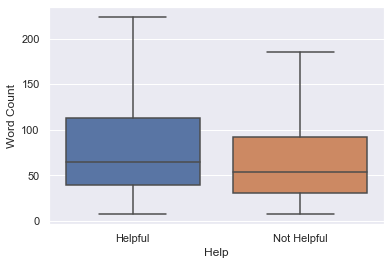

In [20]:
df.head()
sns.boxplot(x='Help',y='Word Count',data=df[(df['Help']=='Helpful')|(df['Help']=='Not Helpful')],showfliers=False)

## 4. Frequency of veiwers

In [21]:
# Now I wanna see how is the word frequency affected by the frequency of viewers , is it affected or not
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Perc_help,Help,Word Count
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,>75%,Helpful,48
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not mentioned,0,31
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,>75%,Helpful,94
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,>75%,Helpful,41
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Not mentioned,0,27


In [22]:
x=df['UserId'].value_counts()

In [38]:
arr1=[]
for i in tqdm(x.index[:-1]):
    if x.loc[i]>=5:
        arr1.append('Frequent')
    else:
        arr1.append('Not Frequent')

100%|█████████████████████████████████████████████████████████████████████████| 40047/40047 [00:00<00:00, 51541.89it/s]


In [31]:
arr2=[]
for i in tqdm(x.index[-1]):
    arr2.append(int(round(np.median(df[df['UserId']==i]['Score']))))

100%|███████████████████████████████████████████████████████████████████████████| 40047/40047 [02:49<00:00, 236.73it/s]


In [41]:
da=pd.DataFrame({'User':arr1,'Score':arr2})

In [42]:
da['User'].value_counts()

Not Frequent    39687
Frequent          360
Name: User, dtype: int64

C:\Users\Kushagra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


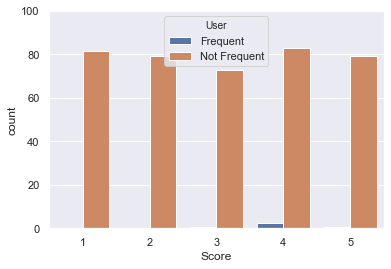

In [43]:
ax=sns.countplot('Score',hue='User',data=da,ax=plt.axes(ylim=(0,100)))
for i in range(10):
    k=ax.patches[i]
    if i<5:
        l=len(df[df['Score']==int(k.get_x()+1.4)])
        k.set_height(k.get_height()/l*100)
    else:
        l=len(df[df['Score']==int(k.get_x()+1)])
        k.set_height(k.get_height()/l*100)

# Conclusion:
* Most of the ratings are either 4 or 5(75% of data)
* Half of the points are neither mentioned Helpful nor Not helpful,out of remaining most were helpful.
* More is the rating higher more is review helpful.
* ratings that are to the extremes are shorter.
* helpful reviews are longer in length.
* Frequent user gives mostly rating 4.